In [206]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from subprocess import check_call
%matplotlib inline

In [184]:
train = pd.read_csv('C:\Users\Steven\Documents\\train.csv')
test = pd.read_csv('C:\Users\Steven\Documents\\test.csv')

In [185]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [186]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [187]:
#most commmon embarked value to fillna

train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [188]:
#distribution of cabin values (doesn't seem useful)

train['Cabin'].value_counts().head()

C23 C25 C27    4
G6             4
B96 B98        4
D              3
C22 C26        3
Name: Cabin, dtype: int64

In [189]:
#fill NaN values

train['Age'] = train['Age'].fillna(train['Age'].median())
train['Embarked'] = train['Embarked'].fillna('S')

In [190]:
train['Gender'] = train['Sex'].map({'female': 0, 'male': 1}).astype(int)
train['Embarked'] = train['Embarked'].map({'S': 0, 'C': 1, 'Q': 2}).astype(int)

In [191]:
del train['Sex']
del train['PassengerId']
del train['Name']
del train['Ticket']
del train['Cabin']

In [192]:
#null accuracy

train['Survived'].value_counts() / train.shape[0]

0    0.616162
1    0.383838
Name: Survived, dtype: float64

In [193]:
#split the data to train and test

X, y = train.drop('Survived', axis = 1), train['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

In [196]:
#knn

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.73094170403587444

In [197]:
#check different values of k

scores = []
for i in range(1, 30):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
    
scores

[0.69506726457399104,
 0.67264573991031396,
 0.73094170403587444,
 0.64125560538116588,
 0.70852017937219736,
 0.65919282511210764,
 0.71748878923766812,
 0.6905829596412556,
 0.6905829596412556,
 0.68161434977578472,
 0.69506726457399104,
 0.68609865470852016,
 0.68609865470852016,
 0.68609865470852016,
 0.68609865470852016,
 0.68609865470852016,
 0.66367713004484308,
 0.67713004484304928,
 0.6905829596412556,
 0.6905829596412556,
 0.66816143497757852,
 0.66367713004484308,
 0.64573991031390132,
 0.65919282511210764,
 0.64125560538116588,
 0.65022421524663676,
 0.64573991031390132,
 0.63677130044843044,
 0.62780269058295968]

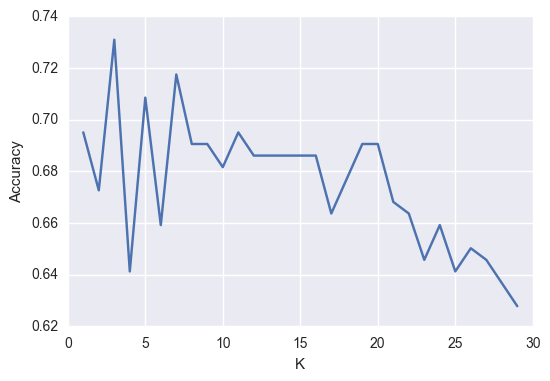

In [198]:
plt.plot(range(1, 30), scores)
plt.ylabel("Accuracy")
plt.xlabel("K")

In [199]:
#modified knn

knn = KNeighborsClassifier(n_neighbors = 15)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.68609865470852016

In [200]:
#can logistic regression perform better?

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
logreg.score(X_test, y_test)

0.81165919282511212

In [201]:
#iterative feature selection

for column in X.columns:
    X_subset = X[[column]]
    knn = LogisticRegression()
    knn.fit(X_subset, y)
    print column, knn.score(X_subset, y)

Pclass 0.679012345679
Age 0.616161616162
SibSp 0.616161616162
Parch 0.608305274972
Fare 0.665544332211
Embarked 0.597081930415
Gender 0.786756453423


In [202]:
X_train.head()

,Pclass,Age,SibSp,Parch,Fare,Embarked,Gender
35,1,42.0,1,0,52.0000,0,1
46,3,28.0,1,0,15.5000,2,1
453,1,49.0,1,0,89.1042,1,1
291,1,19.0,1,0,91.0792,1,0
748,1,19.0,1,0,53.1000,0,1


In [203]:
feature_cols = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Gender']

In [204]:
#decision tree

tree = DecisionTreeClassifier(max_depth = 3, random_state = 1)
tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=1, splitter='best')

In [210]:
tree.score(X_test, y_test)

0.80269058295964124

In [205]:
export_graphviz(tree, out_file = 'tree_titanic.dot', feature_names = feature_cols)

In [211]:
system("dot -Tpng C:\Users\Steven\Documents\tree_titanic.dot -o C:\Users\Steven\Documents\tree_titanic.png")

['The filename, directory name, or volume label syntax is incorrect.']